In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pymc3 as pm
import arviz as az

In [2]:
def f(x):
    return 7*x + 10

In [3]:
x = np.random.uniform(0.1, 10, 50)
y = np.random.normal(f(x), 3*x)

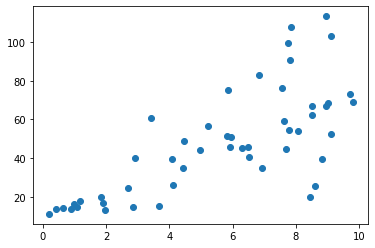

In [4]:
plt.scatter(x, y)

In [5]:
with pm.Model() as model:
    a = pm.Normal("a", 0, 30)
    b = pm.Normal("b", 0, 30)
    sd = pm.HalfNormal("sd", 30)
    likelihood = pm.Normal("likelihood", mu = a*x + b, sd = sd*x, observed = y)

In [6]:
with model:
    trace = pm.sample(2000)

<ipython-input-6-973ff0bd5fd9>:2: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(2000)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sd, b, a]


Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 51 seconds.


/Users/hynekjakes/opt/anaconda3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


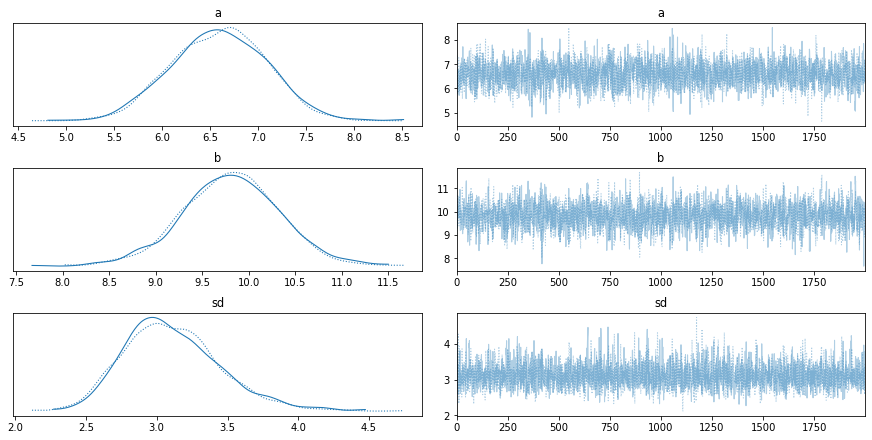

In [7]:
az.plot_trace(trace);

In [8]:
az.summary(trace)

/Users/hynekjakes/opt/anaconda3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a,6.597,0.502,5.677,7.507,0.009,0.007,2929.0,2748.0,1.0
b,9.811,0.522,8.740,10.719,0.009,0.007,3103.0,2719.0,1.0
sd,3.111,0.339,2.520,3.771,0.006,0.004,3333.0,2512.0,1.0


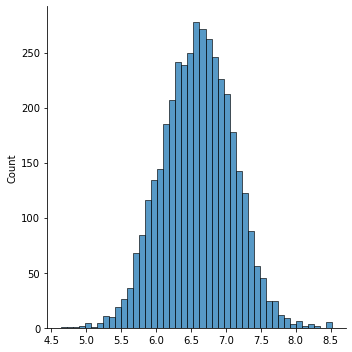

In [9]:
sns.displot(trace["a"])

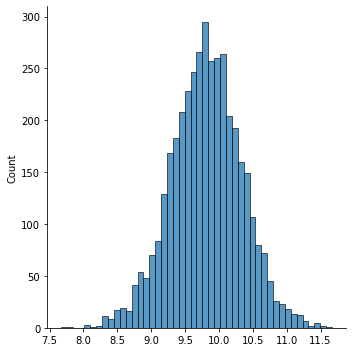

In [10]:
sns.displot(trace["b"])

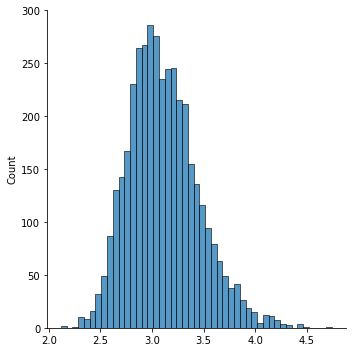

In [11]:
sns.displot(trace["sd"])

In [13]:
x_new = np.linspace(0.1, 15, 100)
y_mu = trace["a"][None, :]*x_new[:, None] + trace["b"][None, :]
y_samples = np.random.normal(y_mu, trace["sd"][None, :]*x_new[:, None])

y_lower = np.quantile(y_samples, axis = 1, q = 0.05)
y_upper = np.quantile(y_samples, axis = 1, q = 0.95)

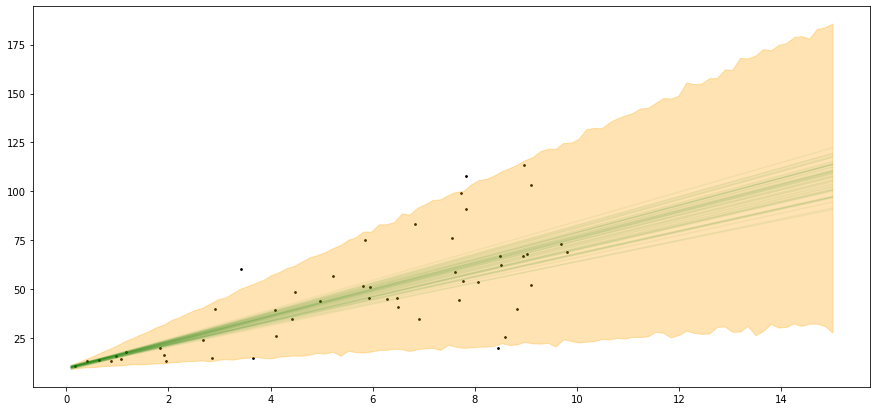

In [14]:
fig = plt.figure(figsize = [15, 7])
plt.scatter(x, y, c = "k", s = 3)
for sample in np.random.choice(trace, size = 50):
    plt.plot(x_new, sample["a"]*x_new[:, None] + sample["b"], c = "g", alpha = 0.05)
plt.fill_between(x_new, y_lower, y_upper, color = "orange", alpha = 0.3)